# Inspiration: Can we correctly identify people suffering from depression from their tweets/messages.

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv('sentiment_tweets3.csv')

In [3]:
df1.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


Does the person have depression? 0 stands for NO and 1 stands for YES

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [5]:
df1.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

There are no missing values

In [6]:
#We do not require index column for the model hence dropping it.
df1.drop('Index',axis=1,inplace=True)

In [7]:
#Using Pandas-profiling to automatically analyze our data
!pip install pandas-profiling

In [8]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df1, title='Data Report', explorative=True)

In [9]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Conclusions from the above Data Report:
1. Duplicate rows are present in the Data 
2. We have Imbalanced data


In [10]:
#Renaming the columns
df1.rename(columns = {'message to examine':'message', 'label (depression result)':'label'}, inplace = True)

In [11]:
df1.head()#columns with new names

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [12]:
#Checking our samples in data
print('Sample message 1:'  +df1.iloc[7]['message']+ '\n')
print('Sample message 2:'  +df1.iloc[305]['message']+'\n')
print('Sample message 3:'  +df1.iloc[1500]['message'])


Sample message 1:23 or 24ï¿½C possible today. Nice 

Sample message 2:awake, lovin' arttm, ff5, the maine, and 30H!3 more than ever 

Sample message 3:Still digesting a (frankly) marvellous wild mushroom risotto and croissant-and-butter pudding. Oh, my thighs have split! 


In [13]:
df2=df1[['message','label']].drop_duplicates()

We have successfully removed all duplicate rows

In [14]:
df2=pd.DataFrame(df2)

In [15]:
df2.shape# checking shape after removing duplicate rows

(10283, 2)

In [16]:
#Importing some more important libraries for data pre-processing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('all')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk

[nltk_data]    |   Package propbank is already up-to-date!
[nltk_data]    | Downloading package ptb to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package ptb is already up-to-date!
[nltk_data]    | Downloading package product_reviews_1 to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_1 is already up-to-date!
[nltk_data]    | Downloading package product_reviews_2 to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package product_reviews_2 is already up-to-date!
[nltk_data]    | Downloading package pros_cons to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package pros_cons is already up-to-date!
[nltk_data]    | Downloading package qc to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package qc is already up-to-date!
[nltk_data]    | Downloading package reuters to
[nltk_data]    | 

[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]    |   Pack

In [17]:
import string 

ps = PorterStemmer()
wl = WordNetLemmatizer()


In [18]:
def preprocess_data(data):
    review =re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) #removal of url
    review =re.sub(r'<.*?>',' ',review) #removal of html tags
    review = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',review)
    review = re.sub('[^a-zA-Z]',' ',review) # filtering out miscellaneous text except alphabet.
    review = review.lower() # Lowering all the words in text
    review = review.split()
    review = [wl.lemmatize(words) for words in review if words not in stopwords.words('english')] #lemmatizing
    review = [i for i in review if len(i)>2] # Removal of words with length<2
    review = ' '.join(review)
    return review

df2["Cleaned_message"] = df2["message"].apply(preprocess_data)

Testing a sample to check the above function 

In [19]:
s="Unnecessary symbols in NLP  #hash ---- ¿½C "" ????$%^&* :;' {abcd} 999999 http://www.facebook.com,http://www.twitter.com "
print(preprocess_data(s))

unnecessary symbol nlp hash abcd


In [20]:
#Checking cleaned data
df2.head(20)

,message,label,Cleaned_message
0,just had a real good moment. i missssssssss hi...,0,real good moment miss much
1,is reading manga http://plurk.com/p/mzp1e,0,reading manga
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0,comeagainjen
3,@lapcat Need to send 'em to my accountant tomo...,0,lapcat need send accountant tomorrow oddly eve...
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,add myspace myspace com lookthunder
5,so sleepy. good times tonight though,0,sleepy good time tonight though
6,"@SilkCharm re: #nbn as someone already said, d...",0,silkcharm nbn someone already said fiber home ...
7,23 or 24ï¿½C possible today. Nice,0,possible today nice
8,nite twitterville workout in the am -ciao,0,nite twitterville workout ciao
9,"@daNanner Night, darlin'! Sweet dreams to you",0,dananner night darlin sweet dream


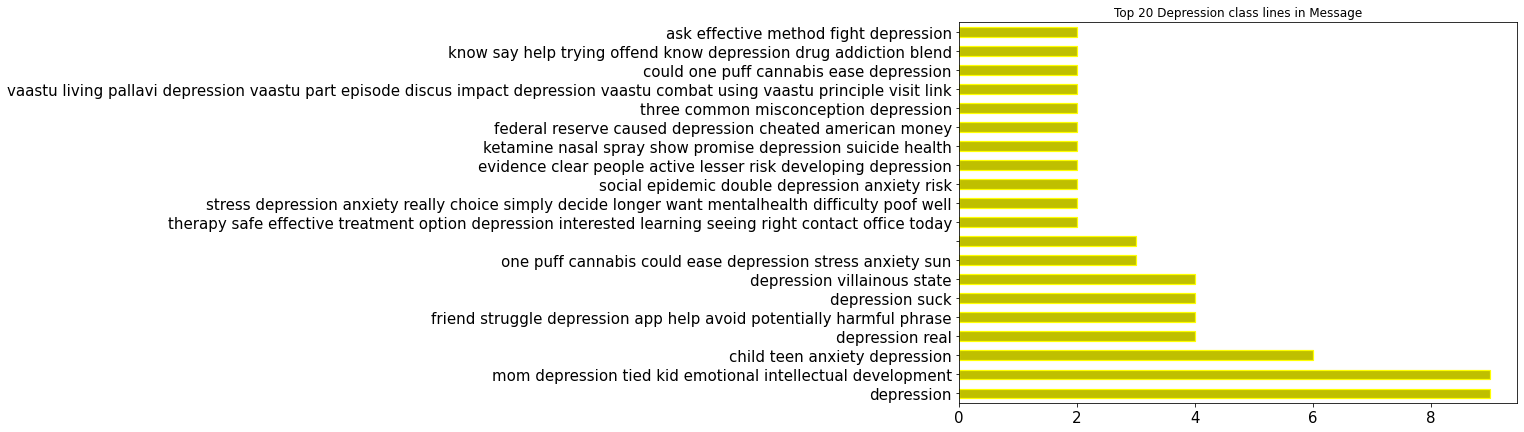

In [21]:
# Analysing Top 20 depression message lines in text .
plt.figure(figsize=(10,7))
df2[df2['label']==1]['Cleaned_message'].value_counts()[:20].plot(kind='barh', fontsize=15,title='Top 20 Depression class lines in Message', 
                                                                 color='y',edgecolor='yellow', linewidth=1.2)
plt.show()


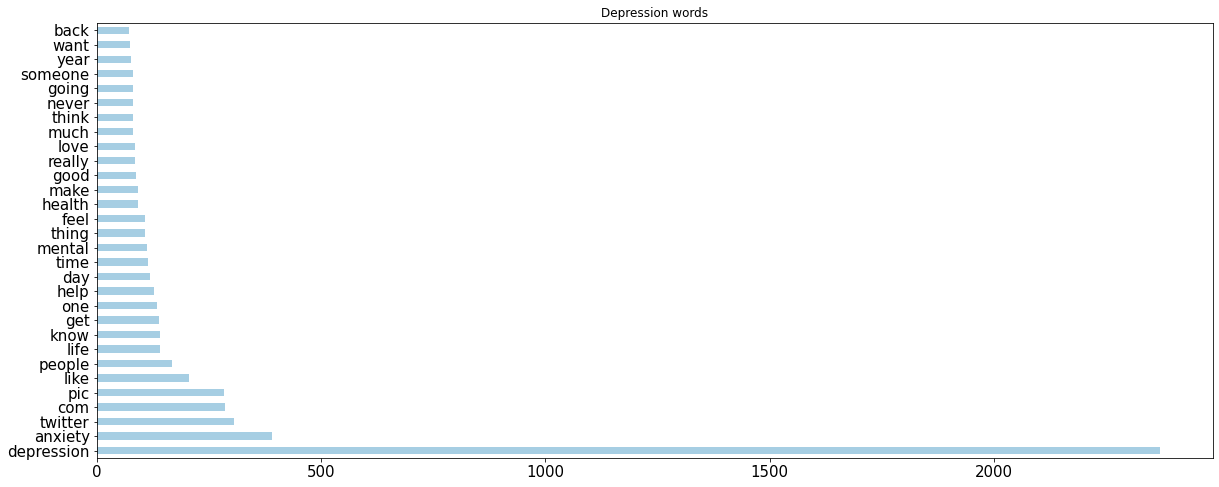

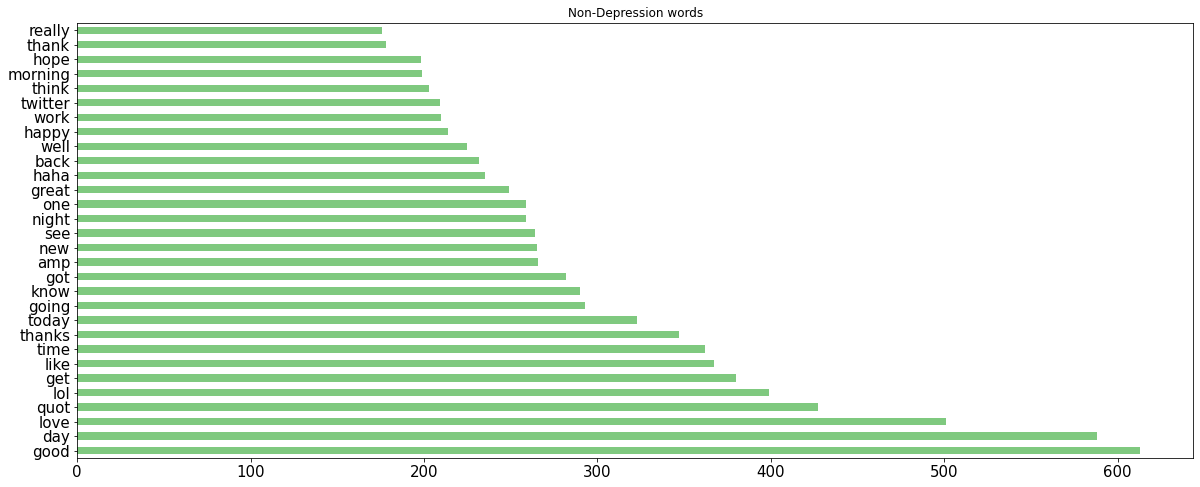

In [22]:
#Finding top 30 most frequent words used in Depression and No Depression classes 
depression = df2[df2.label==1]["Cleaned_message"]
no_depression = df2[df2.label==0]["Cleaned_message"]

color = ['Paired','Accent']
splitedData = [depression,no_depression]
title = ["Depression words", "Non-Depression words"]
for item in range(2):
    plt.figure(figsize=(20,8))
    plt.title(title[item],fontsize=12)
    pd.Series(' '.join([i for i in splitedData[item]]).split()).value_counts().head(30).plot(kind='barh',fontsize=15,colormap=color[item], linewidth=1.2)
    plt.show()

Inference:-

The above Bar Charts displays the top 30 Words post cleaning in message. From the chart, it is observed that the most occuring word for depression message is: depression (approx. 3000) and for non-depression is : good (600+) while the least occuring are feel, make, health (100) for depression and morning, think etc. (250) for non-depression.

From above chart, it appears that our cleaned message still contains some unnecessary words (such as: like, amp, get, would etc.) that aren't relevant and can confuse our model, resulting in false prediction. Now, we will further remove some confusing words from message based on above charts.



In [24]:
#More cleaning can be done and words which do not hold any significant role can be dropped
common_words = ['like','get','would','way','may','one',
               'see','know','look','got','still','say','amp']

def text_cleaning(data):
    return ' '.join(i for i in data.split() if i not in common_words)

df2["Cleaned_message"] = df2["Cleaned_message"].apply(text_cleaning)


In [25]:
df2.drop('message',axis=1,inplace=True)# keeping only 2 required columns 

In [26]:
df2.shape#after cleaning and removing uncleaned column

(10283, 2)

In [27]:
df2.head()

,label,Cleaned_message
0,0,real good moment miss much
1,0,reading manga
2,0,comeagainjen
3,0,lapcat need send accountant tomorrow oddly eve...
4,0,add myspace myspace com lookthunder


<function matplotlib.pyplot.show(close=None, block=None)>

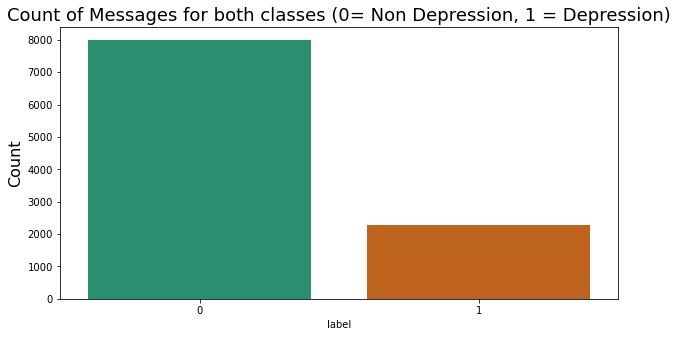

In [28]:
#Checking how imbalanced our data is
plt.figure(figsize=(10,5))
sns.countplot(x='label', data=df2, palette="Dark2")
plt.title("Count of Messages for both classes (0= Non Depression, 1 = Depression)", fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.show

77.75940873286005 % of the data is of label 0 or Non Depression Class 


22.24059126713994 % of the data is of label 1 or Depression Class 


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

In [30]:
#Running GridSearchCV with pipeline method to get the best parameters for vectorizing our data 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
           ('vect', TfidfVectorizer()),
           ('mnb', MultinomialNB())
])
parameters = [{
    'vect__max_df': (0.5, 0.7, 1.0),
    'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2), (1,3),),
    'vect__use_idf': (True, False),
    'vect__norm': ('l1', 'l2', None)
    


}]

grid_search = GridSearchCV(pipeline, parameters)
grid_search.fit(df2['Cleaned_message'], df2['label'])

GridSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('mnb', MultinomialNB())]),
             param_grid=[{'vect__max_df': (0.5, 0.7, 1.0),
                          'vect__max_features': (None, 5000, 10000, 50000),
                          'vect__ngram_range': ((1, 1), (1, 2), (1, 3)),
                          'vect__norm': ('l1', 'l2', None),
                          'vect__use_idf': (True, False)}])

In [31]:
#Retrieving the best parameters
print("Best Params: ", grid_search.best_params_)

Best Params:  {'vect__max_df': 0.5, 'vect__max_features': None, 'vect__ngram_range': (1, 3), 'vect__norm': None, 'vect__use_idf': False}


In [32]:
X=df2['Cleaned_message']
y=df2['label']

In [33]:
#Using the best paramteres obtained from above for our feature 
X = TfidfVectorizer(max_df= 0.5, max_features= None, ngram_range= (1, 3), norm= None, use_idf= False).fit_transform(X)

In [34]:
#Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [35]:
pip install -U imbalanced-learn

# We have imbalanced dataset which needs to be balanced for that we will use SMOTE(Synthetic Minority Oversampling Technique)

In [36]:
from imblearn.over_sampling import SMOTE
smote_oversample=SMOTE()
X_train_sm, y_train_sm =smote_oversample.fit_resample(X_train, y_train)

In [37]:
from collections import Counter
print('Before SMOTE:', Counter(y_train))
print('After SMOTE:', Counter(y_train_sm))

Before SMOTE: Counter({0: 6020, 1: 1692})
After SMOTE: Counter({0: 6020, 1: 6020})


<function matplotlib.pyplot.show(close=None, block=None)>

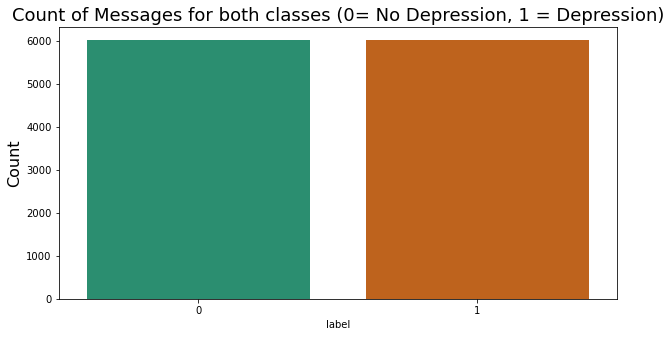

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x=y_train_sm, data=df2, palette="Dark2")
plt.title("Count of Messages for both classes (0= No Depression, 1 = Depression)", fontsize=18)
plt.ylabel('Count', fontsize=16)
plt.show

Our data is balanced now and we can go ahead to make our model

In [39]:
#Using GridSearchCV in a different manner to find the best algorithm with best paramteres
model_params = {
    'svm': {
        'model':LinearSVC(),
        'params' : {
            'penalty':['l1','l2'],
            
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'penalty':['l1','l2'],
            'C': [1,5,10]
            
        }
    },
    'Multinomial_NB' : {
        'model': MultinomialNB(),
        'params': {
            'alpha':[0.5,0.7],
            
            
            
        
            
        }
    }
}

In [40]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_sm, y_train_sm)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])


D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\lib\site-packages\sklearn\svm\_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "D:\anaconda\lib\site-packages\sklearn\svm\_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "D:\anaconda\lib\site-packages\sklearn\svm\_base.py", line 830, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True,

In [41]:
results = df
results.style.background_gradient(cmap='Blues')

,model,best_score,best_params
0,svm,0.997591,{'penalty': 'l2'}
1,random_forest,0.990947,{'n_estimators': 10}
2,logistic_regression,0.998339,"{'C': 5, 'penalty': 'l2'}"
3,Multinomial_NB,0.979485,{'alpha': 0.5}


Logistic Regression has performed best among all the algorithms 

In [42]:
#Using Multinomial Naive bayes algorithm on data as it was used in GridSearchCV with TfIdf vectorizer to find best parameters
mb=MultinomialNB(alpha= 0.5).fit(X_train_sm, y_train_sm)

In [43]:
mb.score(X_test,y_test)

0.9618825359782186

In [44]:
#Checking accuracy of our best performing algorithm Logistic Regression on our test data
lr = LogisticRegression(penalty='l2',C= 5).fit(X_train_sm, y_train_sm)

In [45]:
lr.score(X_test,y_test)

0.9972773239984442

Since it gives almost same accuracy with test data so we can say it has not overfit the data

In [46]:
y_pred=lr.predict(X_test)
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[1975,    1],
       [   6,  589]], dtype=int64)

In [47]:
print(metrics.classification_report(y_test,y_pred,labels=[0,1],target_names = ['class No depression', 'class Depression']))

                     precision    recall  f1-score   support

class No depression       1.00      1.00      1.00      1976
   class Depression       1.00      0.99      0.99       595

           accuracy                           1.00      2571
          macro avg       1.00      0.99      1.00      2571
       weighted avg       1.00      1.00      1.00      2571



# Using Deep Learning techniques to make a classification model

In [48]:
import tensorflow as tf

In [49]:
#Importing important Neural Network libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense    
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.text import Tokenizer

In [50]:
#Dividing data into feature and target
X1=df2['Cleaned_message']
y1=df2['label']

In [51]:
#Tokenizing ie assigning numbers to words of our data 
t=Tokenizer()
t.fit_on_texts(X1)# takes all the unique words, creates a vocabulary and assigns each word an index.
vocab_size=len(t.word_index)+1
vocab_size#total unique words in corpus

18566

In [52]:
vec_rep=t.texts_to_sequences(X1)# replaces words in sentences with their respective vocabulary index 
max_length= max([(len(x)) for x in (vec_rep)])
max_length#sentence with max length in corpus

75

In [57]:
sent_length= 75
embedded_docs=pad_sequences(vec_rep, padding ='pre', maxlen=sent_length)# making all sentences of equal lengths
print(embedded_docs)

[[   0    0    0 ...  436  152   24]
 [   0    0    0 ...    0  354 5722]
 [   0    0    0 ...    0    0 2877]
 ...
 [   0    0    0 ...    1  194  105]
 [   0    0    0 ...    2    1   45]
 [   0    0    0 ...    0    0    0]]


In [64]:
embedding_vector_dim=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_dim,input_length=sent_length))#converts words to vectors based on dimensions
model.add(Dropout(0.4))#for regularization
model.add(LSTM(100))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 75, 40)            742640    
_________________________________________________________________
dropout (Dropout)            (None, 75, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 799,141
Trainable params: 799,141
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
X_a=np.array(embedded_docs)
y_a=np.array(y)

In [66]:
#Splitting our data for validation
X_train,X_test,y_train,y_test=train_test_split(X_a,y_a,test_size=0.30)

In [67]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
113/113 [==============================] - 22s 147ms/step - loss: 0.3707 - accuracy: 0.8543 - val_loss: 0.1169 - val_accuracy: 0.9708
Epoch 2/10
113/113 [==============================] - 17s 155ms/step - loss: 0.0454 - accuracy: 0.9864 - val_loss: 0.0531 - val_accuracy: 0.9974
Epoch 3/10
113/113 [==============================] - 18s 156ms/step - loss: 0.0130 - accuracy: 0.9983 - val_loss: 0.0108 - val_accuracy: 0.9984
Epoch 4/10
113/113 [==============================] - 15s 129ms/step - loss: 0.0050 - accuracy: 0.9993 - val_loss: 0.0104 - val_accuracy: 0.9974
Epoch 5/10
113/113 [==============================] - 15s 131ms/step - loss: 0.0040 - accuracy: 0.9993 - val_loss: 0.0102 - val_accuracy: 0.9977
Epoch 6/10
113/113 [==============================] - 15s 137ms/step - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0124 - val_accuracy: 0.9961
Epoch 7/10
113/113 [==============================] - 16s 142ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.0094 - val_ac

In [70]:
y_pr=model.predict_classes(X_test)
confusion_matrix(y_test,y_pr)

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[2418,    1],
       [   5,  661]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pr)

0.9980551053484603

Accuracy achieved is good

# It is time to test our model 

In [82]:
#Giving some external data to identify whether they are depression or no-depresssion messages
predict_this=['I feel lost inside of myself',
             'Stay strong, your story is not over yet']

We are not using 't.fit_on_texts' code here because we want to look for the above mentioned words in the already created vocabulary

In [83]:
vec_rep=t.texts_to_sequences(predict_this)
max_length= max([(len(x)) for x in (vec_rep)])
max_length

4

In [84]:
vec_rep

[[34, 417, 789], [262, 696, 361, 179]]

In [85]:
sent_length= 4
embedded_docs=pad_sequences(vec_rep, padding ='pre', maxlen=sent_length)
print(embedded_docs)

[[  0  34 417 789]
 [262 696 361 179]]


In [86]:
model.predict_classes(embedded_docs)

array([[1],
       [0]])

# 1: Depression, 0: No-depression. We can see that the depression and no-depression messages have been correctly classified.